# Mad Men Report

**Maciej Lorens, 419763**

![Mad Men Logo](MadMenLogo.png)

## Description

**Mad Men** is a critically acclaimed American television series created by *Matthew Weiner*. Set primarily in the 1960s, the show revolves around the personal and professional lives of advertising executives at the fictional Sterling Cooper advertising agency on Madison Avenue in New York City.

In [11]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md

df = pd.read_csv('mad_men.csv')

In [12]:
print(tabulate(df.describe().applymap("{0:.2f}".format), headers = 'keys', tablefmt = 'psql'))

+-------+----------+-----------+--------------+
|       |   Season |   Episode |   Viewership |
|-------+----------+-----------+--------------|
| count |    90    |     90    |        90    |
| mean  |     4    |      6.94 |         1.92 |
| std   |     2.03 |      3.75 |         0.62 |
| min   |     1    |      1    |         0.61 |
| 25%   |     2    |      4    |         1.58 |
| 50%   |     4    |      7    |         1.94 |
| 75%   |     6    |     10    |         2.31 |
| max   |     7    |     14    |         3.54 |
+-------+----------+-----------+--------------+


## Viewership over time

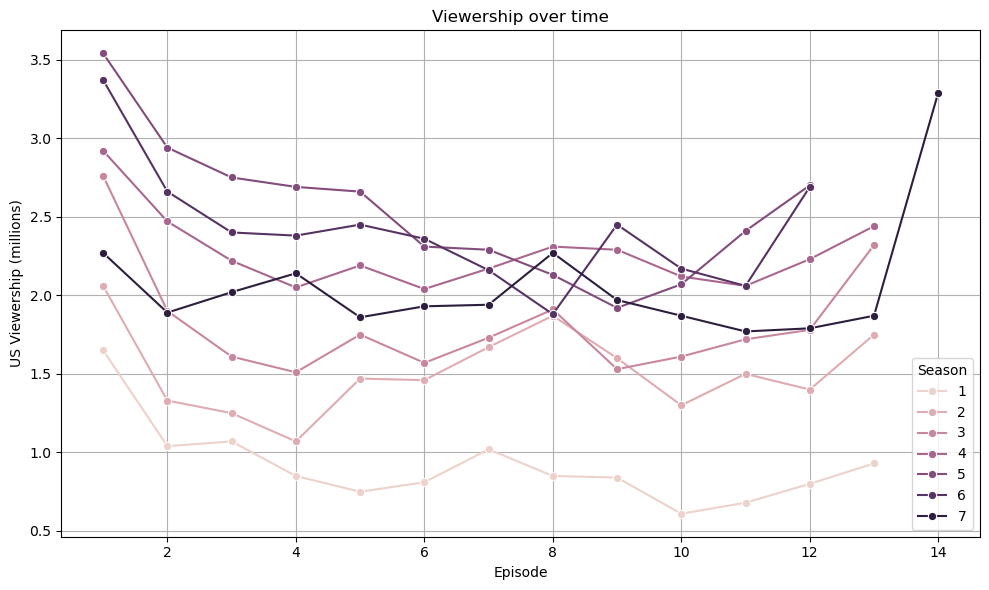

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Episode', y='Viewership', hue='Season', marker='o', linestyle='-')
plt.title('Viewership over time')
plt.xlabel('Episode')
plt.ylabel('US Viewership (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Viewership season to season

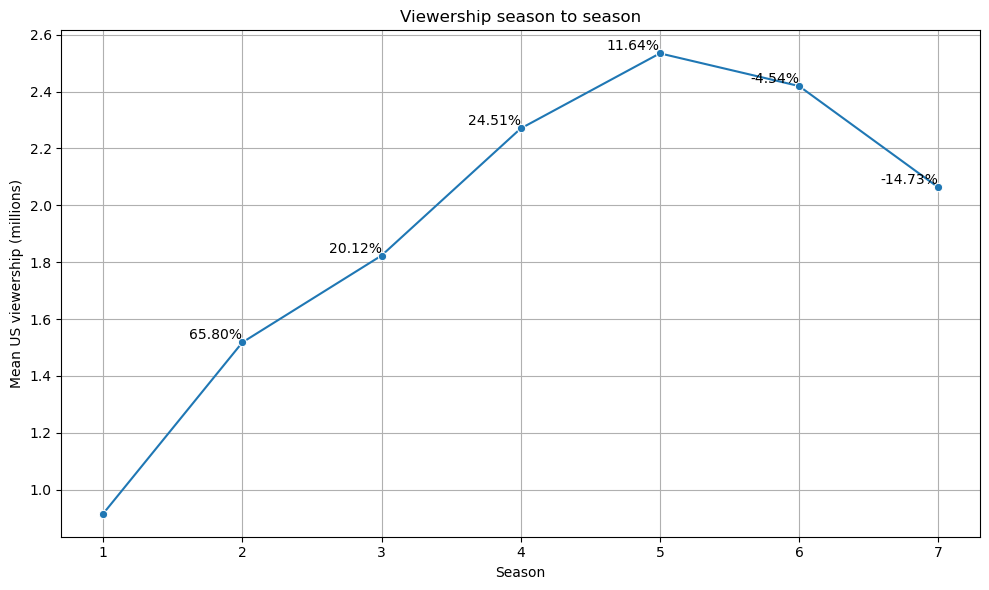

In [14]:
def compute_percentage_change(mean_viewership):
    percentage_changes = []
    for i in range(1, len(mean_viewership)):
        change = ((mean_viewership[i] - mean_viewership[i - 1]) / mean_viewership[i - 1]) * 100
        percentage_changes.append(change)
    return percentage_changes

grouped_df = df.groupby('Season')['Viewership'].mean().reset_index()
percentage_changes = compute_percentage_change(grouped_df['Viewership'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Season', y='Viewership', marker='o', linestyle='-')
for i, change in enumerate(percentage_changes):
    plt.text(i+2, grouped_df['Viewership'][i+1], f'{change:.2f}%', ha='right', va='bottom')
plt.title('Viewership season to season')
plt.xlabel('Season')
plt.ylabel('Mean US viewership (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
print(f"The highest boost in viewership happened between seasons {np.argmax(percentage_changes) + 1} and {np.argmax(percentage_changes) + 2} and was equal to {np.max(percentage_changes):.2f}%. The highest drop in viewership of {np.min(percentage_changes):.2f}% came between seasons {np.argmin(percentage_changes) + 1} and {np.argmin(percentage_changes) + 2}.")

The highest boost in viewership happened between seasons 1 and 2 and was equal to 65.80%. The highest drop in viewership of -14.73% came between seasons 6 and 7.
